# 项目介绍

本项目将对外卖订单成交数据（共4419条记录）进行数据清洗、数据可视化、数据分析，阐述销售现状、挖掘潜在规律、发现存在问题、提出可行性建议。

# 数据介绍

查看数据

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
路径 = 'D:/个人练习手册/orders.csv'
数据 = pd.read_csv(路径,encoding = 'gbk')
print(数据.head())

         addTime        下单日期               下单日期时间      下单时间      品牌名称  城市  ... 订单数   订单金额      距离  配送费       门店ID  餐盒费
0  2020/8/1 9:22  2020-07-28  2020-07-28 11:01:00  11:01:28  拌客（武宁路店）  上海  ...   1  43.80   797.0  0.8  337460136  2.0
1  2020/8/1 9:22  2020-07-28  2020-07-28 20:12:00  20:12:39  拌客（武宁路店）  上海  ...   1  57.96   239.0  0.8  337460136  2.0
2  2020/8/1 9:23  2020-07-28  2020-07-28 20:18:00  20:18:21  拌客（武宁路店）  上海  ...   1  63.04   239.0  0.8  337460136  2.0
3  2020/8/1 9:23  2020-07-28  2020-07-28 11:42:00  11:42:03  拌客（武宁路店）  上海  ...   1  45.52  2978.0  3.3  337460136  2.0
4  2020/8/1 9:24  2020-07-28  2020-07-28 23:06:00  23:06:48  拌客（武宁路店）  上海  ...   1  65.72   518.0  2.8  337460136  2.0

[5 rows x 37 columns]


数据的基本情况

In [11]:
数据.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   addTime    4419 non-null   object 
 1   下单日期       4419 non-null   object 
 2   下单日期时间     4419 non-null   object 
 3   下单时间       4419 non-null   object 
 4   品牌名称       4419 non-null   object 
 5   城市         4419 non-null   object 
 6   平台         4419 non-null   object 
 7   用户id       4419 non-null   int64  
 8   订单id       4419 non-null   int64  
 9   订单状态       4419 non-null   object 
 10  配送地址eleme  4419 non-null   object 
 11  配送坐标       4419 non-null   object 
 12  配送坐标 - 纬度  4419 non-null   float64
 13  配送坐标 - 经度  4419 non-null   float64
 14  配送类型       4419 non-null   int64  
 15  门店名称       4419 non-null   object 
 16  order_15d  3217 non-null   float64
 17  order_30d  3217 non-null   float64
 18  order_60d  3217 non-null   float64
 19  order_7d   3217 non-null   float64
 20  order_90

* 一共有37个字段，
* 'order_15d'、'order_30d'、'order_60d'、'order_7d'、'order_90d'、'距离'的非空计数少于4419
* ‘下单日期’、‘下单日期时间’、‘下单时间’的数据类型不符合类型，如果用到的话需要修改

# 数据预处理

## 数据格式整理

### 规范列名

In [12]:
# 查看列名是否包含空格
数据.columns

Index(['addTime', '下单日期', '下单日期时间', '下单时间', '品牌名称', '城市', '平台', '用户id', '订单id',
       '订单状态', '配送地址eleme', '配送坐标', '配送坐标 - 纬度', '配送坐标 - 经度', '配送类型', '门店名称',
       'order_15d', 'order_30d', 'order_60d', 'order_7d', 'order_90d',
       'sku去重菜品数', '品牌id', '商家实收', '商家补贴', '平台补贴', '总补贴', '服务费', '用户实付',
       '菜品个数', '菜品总数', '订单数', '订单金额', '距离', '配送费', '门店ID', '餐盒费'],
      dtype='object')

### 修改关于时间数据的数据类型

In [45]:
数据['下单日期'] = pd.to_datetime(数据['下单日期'])
数据['下单日期时间'] = pd.to_datetime(数据['下单日期时间'])

### 缺失值处理

In [29]:
# 列order_15d的缺失信息
缺失 = print(数据['order_15d'].isnull())
a=sum(数据['order_15d'].isnull())
print(f'缺失数量：{a}')
b = format(a/4419,'.2%')
print(f'缺失比例：{b}')


0       False
1        True
2       False
3        True
4        True
        ...  
4414    False
4415    False
4416    False
4417    False
4418    False
Name: order_15d, Length: 4419, dtype: bool
缺失数量：1202
缺失比例：27.20%


In [31]:
# 检查数据

由于此次分析的目的不涉及缺失order的那几个字段，故不需要对其进行处理

### 异常值处理

In [32]:
数据.describe()

,用户id,订单id,配送坐标 - 纬度,配送坐标 - 经度,配送类型,order_15d,order_30d,order_60d,order_7d,order_90d,sku去重菜品数,品牌id,商家实收,商家补贴,平台补贴,总补贴,服务费,用户实付,菜品个数,菜品总数,订单数,订单金额,距离,配送费,门店ID,餐盒费
count,4.419000e+03,4.419000e+03,4419.000000,4419.000000,4419.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,4419.000000,4419.0,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.0,4419.000000,4413.000000,4419.000000,4.419000e+03,4419.000000
mean,5.750679e+08,2.304600e+18,31.199590,121.271417,1102.247567,1.139882,1.417470,1.557973,0.769039,1.600249,10.175153,6108.0,16.288959,25.551867,2.051957,27.603824,0.153028,23.350342,10.196651,10.548993,1.0,50.979737,1500.162475,2.417990,7.381772e+08,2.335144
std,7.899761e+08,2.442473e+18,1.150595,4.472177,995.076487,1.938021,2.373172,2.630986,1.343100,2.726204,3.628593,0.0,9.346231,6.380767,2.105196,6.827127,5.496264,10.944536,3.657969,3.783292,0.0,14.768896,837.964157,1.557213,9.434445e+08,0.727017
min,-2.042585e+09,9.428110e+16,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6108.0,-4.700000,0.000000,0.000000,0.000000,-39.210000,1.360000,1.000000,2.000000,1.0,17.760000,0.000000,0.000000,9.428110e+06,0.000000
25%,6.308639e+07,9.698620e+16,31.235668,121.425318,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,6108.0,10.290000,21.900000,0.000000,23.000000,-5.200000,16.680000,8.000000,9.000000,1.0,42.140000,865.000000,0.800000,9.698624e+06,2.000000
50%,2.298519e+08,9.698620e+16,31.242761,121.436763,2002.000000,0.000000,1.000000,1.000000,0.000000,1.000000,10.000000,6108.0,15.700000,25.000000,2.000000,27.000000,4.500000,21.880000,10.000000,11.000000,1.0,49.780000,1379.000000,3.000000,9.698624e+06,2.000000
75%,8.887662e+08,5.006360e+18,31.247879,121.447647,2002.000000,1.000000,2.000000,2.000000,1.000000,2.000000,12.000000,6108.0,21.120000,28.100000,3.000000,31.100000,4.500000,28.160000,12.000000,13.000000,1.0,57.480000,2084.000000,3.000000,2.043565e+09,2.500000
max,2.972178e+09,5.007880e+18,31.285071,121.489317,2002.000000,15.000000,20.000000,25.000000,11.000000,25.000000,41.000000,6108.0,167.170000,164.000000,25.000000,164.000000,30.580000,209.680000,41.000000,46.000000,1.0,336.900000,4604.000000,9.000000,2.043565e+09,15.000000


观察得出，订单金额的最大值与75%分位数等在合理区间，判断没有异常值

### 重复值处理

In [39]:
重复 = 数据.duplicated(subset=None,keep='first')
print(数据[重复])

Empty DataFrame
Columns: [addTime, 下单日期, 下单日期时间, 下单时间, 品牌名称, 城市, 平台, 用户id, 订单id, 订单状态, 配送地址eleme, 配送坐标, 配送坐标 - 纬度, 配送坐标 - 经度, 配送类型, 门店名称, order_15d, order_30d, order_60d, order_7d, order_90d, sku去重菜品数, 品牌id, 商家实收, 商家补贴, 平台补贴, 总补贴, 服务费, 用户实付, 菜品个数, 菜品总数, 订单数, 订单金额, 距离, 配送费, 门店ID, 餐盒费]
Index: []


未出现重复值

# 数据分析

## 描述性统计

In [41]:
数据1 = 数据.copy()
数据1.describe()

,用户id,订单id,配送坐标 - 纬度,配送坐标 - 经度,配送类型,order_15d,order_30d,order_60d,order_7d,order_90d,sku去重菜品数,品牌id,商家实收,商家补贴,平台补贴,总补贴,服务费,用户实付,菜品个数,菜品总数,订单数,订单金额,距离,配送费,门店ID,餐盒费
count,4.419000e+03,4.419000e+03,4419.000000,4419.000000,4419.000000,3217.000000,3217.000000,3217.000000,3217.000000,3217.000000,4419.000000,4419.0,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.0,4419.000000,4413.000000,4419.000000,4.419000e+03,4419.000000
mean,5.750679e+08,2.304600e+18,31.199590,121.271417,1102.247567,1.139882,1.417470,1.557973,0.769039,1.600249,10.175153,6108.0,16.288959,25.551867,2.051957,27.603824,0.153028,23.350342,10.196651,10.548993,1.0,50.979737,1500.162475,2.417990,7.381772e+08,2.335144
std,7.899761e+08,2.442473e+18,1.150595,4.472177,995.076487,1.938021,2.373172,2.630986,1.343100,2.726204,3.628593,0.0,9.346231,6.380767,2.105196,6.827127,5.496264,10.944536,3.657969,3.783292,0.0,14.768896,837.964157,1.557213,9.434445e+08,0.727017
min,-2.042585e+09,9.428110e+16,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6108.0,-4.700000,0.000000,0.000000,0.000000,-39.210000,1.360000,1.000000,2.000000,1.0,17.760000,0.000000,0.000000,9.428110e+06,0.000000
25%,6.308639e+07,9.698620e+16,31.235668,121.425318,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,6108.0,10.290000,21.900000,0.000000,23.000000,-5.200000,16.680000,8.000000,9.000000,1.0,42.140000,865.000000,0.800000,9.698624e+06,2.000000
50%,2.298519e+08,9.698620e+16,31.242761,121.436763,2002.000000,0.000000,1.000000,1.000000,0.000000,1.000000,10.000000,6108.0,15.700000,25.000000,2.000000,27.000000,4.500000,21.880000,10.000000,11.000000,1.0,49.780000,1379.000000,3.000000,9.698624e+06,2.000000
75%,8.887662e+08,5.006360e+18,31.247879,121.447647,2002.000000,1.000000,2.000000,2.000000,1.000000,2.000000,12.000000,6108.0,21.120000,28.100000,3.000000,31.100000,4.500000,28.160000,12.000000,13.000000,1.0,57.480000,2084.000000,3.000000,2.043565e+09,2.500000
max,2.972178e+09,5.007880e+18,31.285071,121.489317,2002.000000,15.000000,20.000000,25.000000,11.000000,25.000000,41.000000,6108.0,167.170000,164.000000,25.000000,164.000000,30.580000,209.680000,41.000000,46.000000,1.0,336.900000,4604.000000,9.000000,2.043565e+09,15.000000


初步了解数据：
* 订单情况
    * 共记录4419条订单
* 订单总金额
    * 平均每单订单50.98，最小金额17.76，最大金额336.9


## 总体销售情况

### 总销售额:225279.46元

In [54]:
print(数据1['订单金额'].sum())

225279.46000000002


### 客单价

In [56]:
# 按客户数量

round(数据1['订单金额'].sum() / 数据1['用户id'].nunique(),2)

77.6

平均每位用户下单的金额为：77.6元

In [58]:
# 按订单数量
round(数据1['订单金额'].sum() / 数据1['订单id'].nunique(),2)

886.93

平均每笔订单金额为：886.93元

## 用户分析

### 用户总数量

In [59]:
# 用户总数量
print(数据1['用户id'].nunique())

2903


### 按距离划分用户

In [66]:
# 距离的基本信息
print(数据1['距离'].describe())
print('*'*30)
#距离缺失值的个数
a = sum((数据1['距离'].isnull()))
比例 = format(a/4419,'.2%')
print(f'缺失比例：{比例}')

count    4413.000000
mean     1500.162475
std       837.964157
min         0.000000
25%       865.000000
50%      1379.000000
75%      2084.000000
max      4604.000000
Name: 距离, dtype: float64
******************************
缺失比例：0.14%


In [67]:
# 删除缺失行
数据2 = 数据1.dropna()
b = sum((数据2['距离'].isnull()))
print(b)

0


In [74]:
# 处理后的距离信息
print(数据2['距离'].max()) 
print(数据2['距离'].min())

4328.0
0.0


根据最大距离和最小距离，将距离划分为一A：0-1、B:1-2、C:2-3、D：3-4、E：4-5

In [78]:
def 距离(x):
    if 0 <= x < 1000:
        return('A')
    elif 1000 <= x < 2000:
        return('B')
    elif 2000 <= x <3000:
        return('C')
    elif 3000 <= x < 4000:
        return('D')
    else:
        return('E')  
数据2['距离划分'] = 数据['距离'].apply(距离)
print(数据2['距离划分'])
print(数据2.head(67))

0       A
2       A
6       A
8       A
9       D
       ..
4414    A
4415    B
4416    B
4417    A
4418    A
Name: 距离划分, Length: 3215, dtype: object
           addTime        下单日期               下单日期时间      下单时间      品牌名称  城市  ...    订单金额      距离  配送费       门店ID  餐盒费 距离划分
0    2020/8/1 9:22  2020-07-28  2020-07-28 11:01:00  11:01:28  拌客（武宁路店）  上海  ...   43.80   797.0  0.8  337460136  2.0    A
2    2020/8/1 9:23  2020-07-28  2020-07-28 20:18:00  20:18:21  拌客（武宁路店）  上海  ...   63.04   239.0  0.8  337460136  2.0    A
6    2020/8/1 9:24  2020-07-28  2020-07-28 21:12:00  21:12:16  拌客（武宁路店）  上海  ...  101.18   851.0  2.8  337460136  2.0    A
8    2020/8/1 9:25  2020-07-28  2020-07-28 22:07:00  22:07:46  拌客（武宁路店）  上海  ...   87.06   578.0  2.8  337460136  6.0    A
9    2020/8/1 9:25  2020-07-28  2020-07-28 20:29:00  20:29:00  拌客（武宁路店）  上海  ...   49.20  3563.0  5.3  337460136  2.0    D
..             ...         ...                  ...       ...       ...  ..  ...     ...     ...  ...        ...

C:\Users\luqin\AppData\Local\Temp/ipykernel_18452/2269451767.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  数据2['距离划分'] = 数据['距离'].apply(距离)


In [107]:
local = 数据2.groupby('距离划分')['用户id'].nunique().reset_index()
local = local.rename(columns={'用户id':'用户数量'})
local = local.sort_values('用户数量').reset_index(drop=True)
local

,距离划分,用户数量
0,E,12
1,D,96
2,C,521
3,A,639
4,B,799


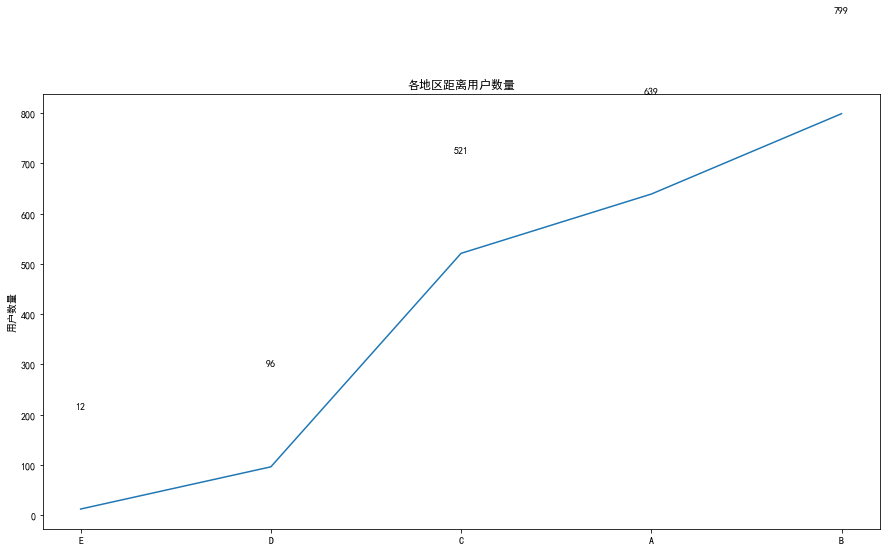

In [94]:
plt.ylabel('用户数量')
plt.title('各地区距离用户数量')
plt.plot(local['距离划分'],local['用户数量'])
for x,y in enumerate(local['用户数量']):
    plt.text(x,y+200,y,ha='center')
plt.show()

* 由上述折线图得知，绝大多数下单用户集中在0-3000米内，超过3000米的下单用户特别少

### 累计订单金额80%

In [98]:
user_28 = 数据2.groupby('用户id').agg(订单金额=('订单金额','sum')).sort_values('订单金额',ascending=False).reset_index()
user_28['累计销售额'] = user_28['订单金额'].cumsum()
user_28

,用户id,订单金额,累计销售额
0,21728382,999.16,999.16
1,538060266,879.62,1878.78
2,649966313,792.12,2670.90
3,1766210559,744.54,3415.44
4,1951131738,727.68,4143.12
...,...,...,...
1993,42099748,26.28,162775.54
1994,590354186,25.90,162801.44
1995,654779587,20.76,162822.20
1996,673620768,19.62,162841.82


In [99]:
p = user_28['订单金额'].cumsum()/user_28['订单金额'].sum()  
key = p[p>0.8].index[0] 
key / user_28.shape[0]

0.6171171171171171

* 百分之八十的销售额是由百分之六十的客户贡献的

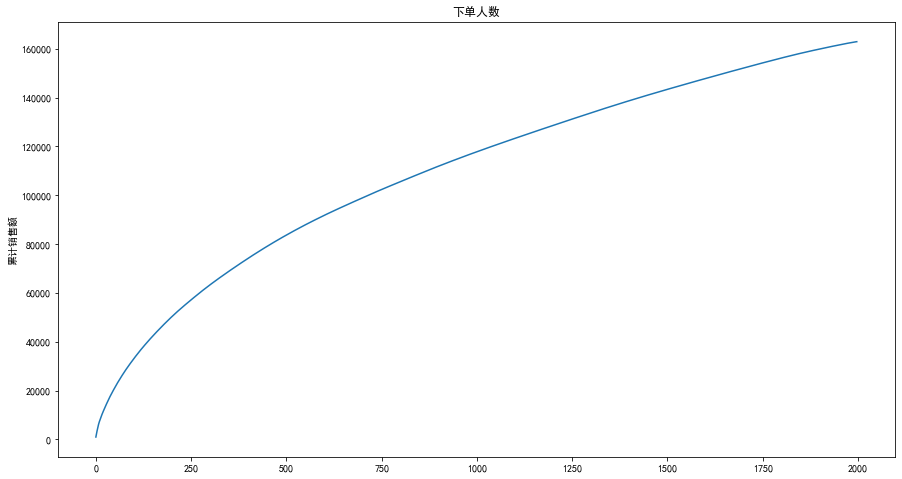

In [104]:
plt.ylabel('累计销售额')
plt.title('下单人数')
plt.plot(user_28.index,user_28['累计销售额'])
plt.show()

### 订单额的分位数

In [105]:
数据2.groupby('用户id').agg(订单金额=('订单金额','sum')).describe(percentiles=(0.01,0.1,0.25,0.75,0.9,0.99)).T


,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
订单金额,1998.0,81.511301,74.591658,17.76,28.8716,39.854,45.16,56.66,87.555,146.586,367.4204,999.16


### 结论

* 下单人数最多的位于1000-2000米内，其次是1000米内和2000-3000米内。主要集中在0-3000米内
* 排除距离特别近的，其他的下单人数会随着距离的增大越来越少。（推测0-1000米小于2000-3000米的原因可能是0-500米内的用户倾向去线下下单）
* 可以推出更多的位于87-146元之间的套餐，并在这些套餐价位上进行更多的优惠，适量减少28元以下的套餐
* 做流量推广时，主要集中在0-3000米内的地区